In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Corrected line to read Excel file
data = pd.read_excel('C:/Users/dell/OneDrive/Documents/Titanic data for data science/U.S Sales Data.xlsx')

data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1001.18,1963.1
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3348.66,3939.6
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,781.22,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,1464.69,2324.9
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1476.14,1822.4


In [2]:
d1=data.copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Cost         7991 n

EDA

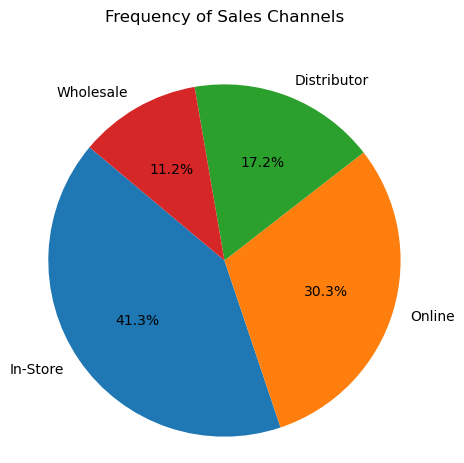

In [3]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'Sales Channel' column
# Replace 'data' with your actual DataFrame variable name

# Count the frequency of each value in the 'Sales Channel' column
channel_counts = data['Sales Channel'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(5, 5))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Sales Channels',y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


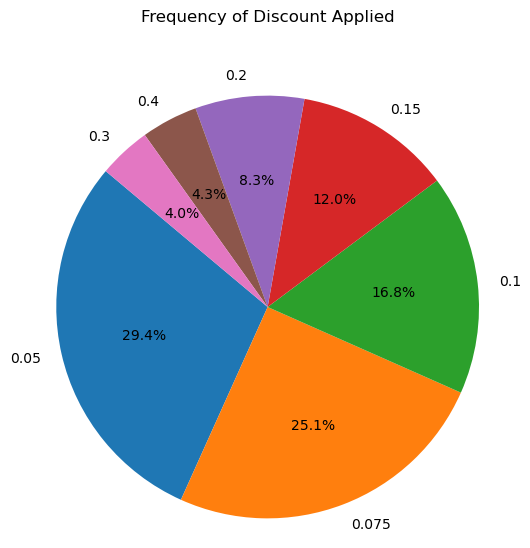

In [4]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the 'Discount Applied' column
# Replace 'data' with your actual DataFrame variable name

# Count the frequency of each value in the 'Discount Applied' column
discount_counts = data['Discount Applied'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Discount Applied',y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [5]:
# Convert 'OrderDate' and 'DeliveryDate' columns to datetime if they are not already in datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['DeliveryDate'] = pd.to_datetime(data['DeliveryDate'])

# Calculate the time difference between 'OrderDate' and 'DeliveryDate' to find delivery time
delivery_time = data['DeliveryDate'] - data['OrderDate']

# Calculate the average delivery time
average_delivery_time = delivery_time.mean()

print("Average delivery time:", average_delivery_time)


Average delivery time: 20 days 16:08:57.004129645


In [6]:
data['CurrencyCode'].value_counts()

CurrencyCode
USD    7991
Name: count, dtype: int64

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


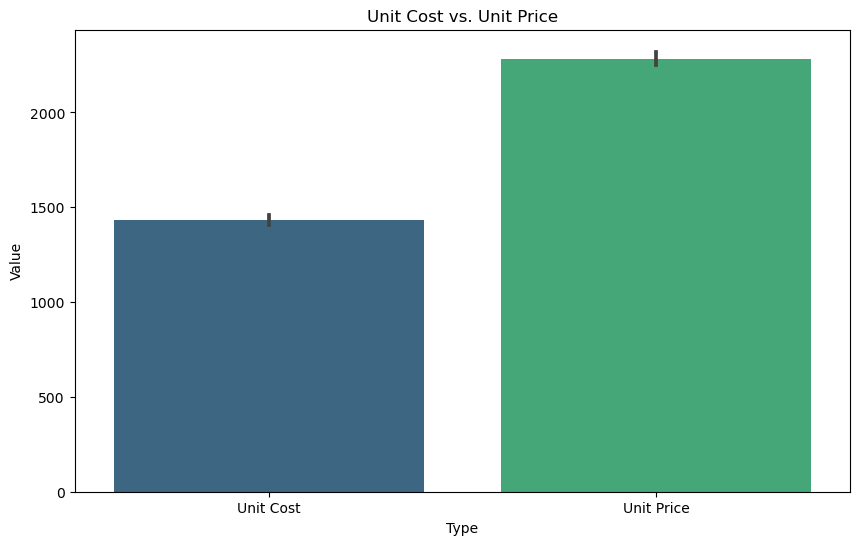

In [7]:
melted_data = data.melt(value_vars=['Unit Cost', 'Unit Price'], var_name='Type', value_name='Value')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Value', data=melted_data, palette='viridis')
plt.title('Unit Cost vs. Unit Price')
plt.xlabel('Type')
plt.ylabel('Value')
plt.show()

In [8]:
# Calculate the mean of 'Unit Cost' and 'Unit Price'
mean_unit_cost = data['Unit Cost'].mean()
mean_unit_price = data['Unit Price'].mean()

# Calculate the average price difference
average_price_diff = mean_unit_price - mean_unit_cost

print("Average price difference:", average_price_diff)


Average price difference: 852.6249906144405


In [9]:
data['Profit'] = data['Unit Price'] - data['Unit Cost']

In [10]:
data['Profit']

0        961.92
1        590.94
2        994.28
3        860.21
4        346.26
         ...   
7986     112.56
7987    1281.04
7988    1032.94
7989     268.00
7990     840.18
Name: Profit, Length: 7991, dtype: float64

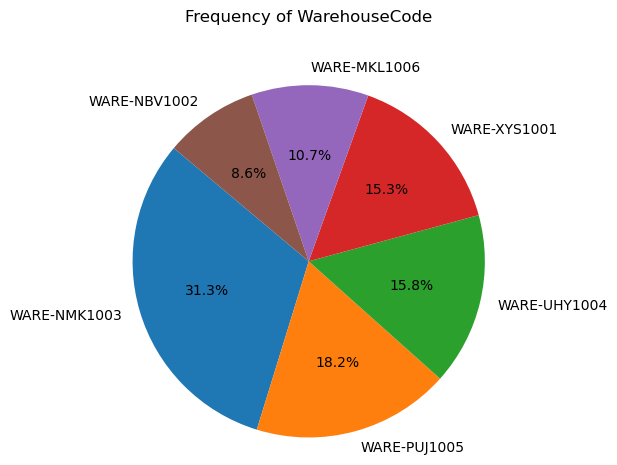

In [19]:
import matplotlib.pyplot as plt

channel_counts = data['WarehouseCode'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(5, 5))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of WarehouseCode',y=1.1)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Model Building

In [12]:
X = d1[['ProcuredDate', 'OrderDate', 'ShipDate']]
X.head(1)

,ProcuredDate,OrderDate,ShipDate
0,2017-12-31,2018-05-31,2018-06-14


In [13]:
X = pd.get_dummies(d1, columns=['WarehouseCode'])
X.head(1)

,OrderNumber,Sales Channel,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,...,Order Quantity,Discount Applied,Unit Cost,Unit Price,WarehouseCode_WARE-MKL1006,WarehouseCode_WARE-NBV1002,WarehouseCode_WARE-NMK1003,WarehouseCode_WARE-PUJ1005,WarehouseCode_WARE-UHY1004,WarehouseCode_WARE-XYS1001
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,...,5,0.075,1001.18,1963.1,False,False,False,False,True,False


In [14]:
# Define features (X) and target (y)
X = d1[['ProcuredDate', 'OrderDate', 'ShipDate']]  # Assuming these are datetime columns
y = d1['DeliveryDate']  # Assuming 'DeliveryDate' is your target variable

# Convert datetime columns to integers
for col in X.columns:
    if X[col].dtype == 'datetime64[ns]':
        X.loc[:, col] = X[col].astype('int64')

# Convert target datetime column to integer
if y.dtype == 'datetime64[ns]':
    y = y.astype('int64')


In [27]:
X.head()

,ProcuredDate,OrderDate,ShipDate
0,1514678400000000000,1527724800000000000,1528934400000000000
1,1514678400000000000,1527724800000000000,1529625600000000000
2,1514678400000000000,1527724800000000000,1529539200000000000
3,1514678400000000000,1527724800000000000,1527897600000000000
4,1523318400000000000,1527724800000000000,1529107200000000000


# Making Predictions

In [34]:
from datetime import datetime
import pandas as pd

def Pre(ProDate, OrdDate, ShiDate):
    # Prepare input data
    data = {'ProcuredDate': [ProDate],
            'OrderDate': [OrdDate],
            'ShipDate': [ShiDate]}
    df = pd.DataFrame(data)

    # Convert to datetime
    datetime_format = "%Y-%m-%d %H:%M:%S"
    df['ProcuredDate'] = pd.to_datetime(df['ProcuredDate'], format=datetime_format)
    df['OrderDate'] = pd.to_datetime(df['OrderDate'], format=datetime_format)
    df['ShipDate'] = pd.to_datetime(df['ShipDate'], format=datetime_format)

    # Get the maximum datetime among the three dates
    max_date = df.max().max()
    
    return max_date.strftime(datetime_format)

In [35]:
ProDate = '2017-12-31 06:23:43'
OrdDate = '2018-01-01 12:34:56'
ShiDate = '2018-01-02 18:45:32'
print(Pre(ProDate, OrdDate, ShiDate))

2018-01-02 18:45:32


In [40]:
ProDate = '2015-12-31 06:23:43'
OrdDate = '2016-05-31 12:34:56'
ShiDate = '2016-06-02 12:15:22'
print(Pre(ProDate, OrdDate, ShiDate))

2016-06-02 12:15:22


# Accuracy of the Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

train_score = r2_score(y_train, train_predictions)
test_score = r2_score(y_test, test_predictions)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

Training R^2 score: 0.9998914550327165
Testing R^2 score: 0.9998907351493515
